<a href="https://colab.research.google.com/github/HemantTiwariGitHub/IntelligenceCodes/blob/master/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

In [2]:
!unzip /content/loan.zip

Archive:  /content/loan.zip
  inflating: loan.csv                


In [0]:
# suggested encoding is UTF8
loan = pd.read_csv('loan.csv', encoding='utf8', low_memory=False)

Follow CRISP-DM Method

# **CRISP-DM : Step#2 Data Understanding**

In [4]:
#Following CRISP-DM Methodology
#check and understand data
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [5]:
#general statistics understanding 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

In [6]:
#understand rows and columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#check the values of most important field of loan status
loan['loan_status'].unique()


array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [8]:
#Need to analyze factors which make loan "Fully Paid" vs "Charged off".
#For this need to remove the loans which are current.
print (loan.groupby('loan_status')['id'].count())
print (loan.groupby('loan_status')['id'].count()/len(loan))



loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: id, dtype: int64
loan_status
Charged Off   0.14
Current       0.03
Fully Paid    0.83
Name: id, dtype: float64


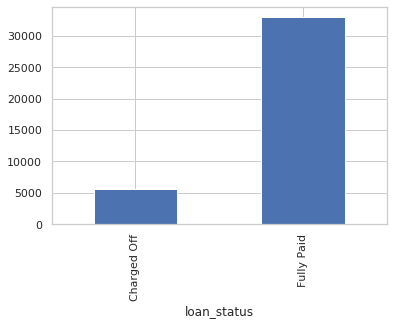

NameError: ignored

In [75]:
import matplotlib.pyplot as plt
AmountGrouped = loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()



### **Important Insight : Charged Off Loans are 14% of All Loans**

# **CRISP-DM : Step#3 Data Preparation (Cleaning and Manipulation)**

In [9]:
#Remove all current accounts, We will check difference only between ChargedOff vs FullyPaid
loan = loan[loan['loan_status']!='Current']
print(loan['loan_status'].unique())
len(loan)

['Fully Paid' 'Charged Off']


38577

Removing all columns which are missing more than 60% of values.
Removing seperately for Paid and Defaulted Loan

In [10]:
#check which columns have blanks, but need to be careful as some colums might be useful only for particular categories
PaidLoan = loan[loan['loan_status']=='Fully Paid']
DefaultedLoan = loan[loan['loan_status']=='Charged Off']

def removeMissing(dataFrame, Threshold):
    missingPercentage = round(100*(dataFrame.isnull().sum()/len(dataFrame.index)))
    missingColumnsWithMoreValuesMissing= list(missingPercentage[missingPercentage >= Threshold].index)
    print(len(missingColumnsWithMoreValuesMissing))
    dataFrame = dataFrame.drop(missingColumnsWithMoreValuesMissing,axis=1)
    return dataFrame

Threshold = 60
PaidLoan = removeMissing(PaidLoan, Threshold)
DefaultedLoan = removeMissing(DefaultedLoan, Threshold)
loan = removeMissing(loan, Threshold)


print(loan.shape)

57
57
57
(38577, 54)


Create a new integer variable for default for easy analysis

In [11]:
#creating a new variable hasDefaulted 
loan['hasDefaulted'] = loan['loan_status'].replace(to_replace = ['Charged Off','Fully Paid'],value = [1,0])
#loan['hasDefaulted']  = loan.astype({'hasDefaulted': 'int'})
print(loan[['loan_status', 'hasDefaulted']])


       loan_status  hasDefaulted
0       Fully Paid             0
1      Charged Off             1
2       Fully Paid             0
3       Fully Paid             0
5       Fully Paid             0
...            ...           ...
39712   Fully Paid             0
39713   Fully Paid             0
39714   Fully Paid             0
39715   Fully Paid             0
39716   Fully Paid             0

[38577 rows x 2 columns]


Creating Derived Variable LoanToIncome Ratio

In [0]:
# creating derived variables 
loan['Loan_To_Income_Ratio'] = loan['loan_amnt']/loan['annual_inc']

Checking Loan Default Rates wrt grade of Loan Assigned

hasDefaulted      0     1  gradeDefault
grade                                  
A              9443   602          0.06
B             10250  1425          0.12
C              6487  1347          0.17
D              3967  1118          0.22
E              1948   715          0.27
F               657   319          0.33
G               198   101          0.34


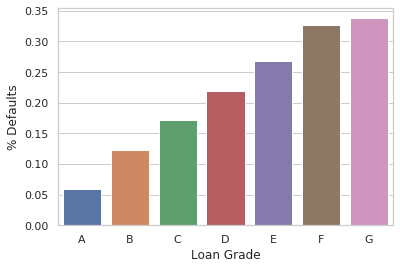

In [78]:
#check loans default wrt individual variables 
LoanCateg = pd.DataFrame(loan.groupby('grade')['hasDefaulted'].value_counts().unstack())
LoanCateg['gradeDefault'] = LoanCateg[1]/(LoanCateg[0]+LoanCateg[1])

listLoan = ['A','B','C','D','E','F','G']
print (LoanCateg)

import seaborn as sns
sns.set(style="whitegrid")
ax =sns.barplot(listLoan,LoanCateg['gradeDefault'])
ax.set(xlabel='Loan Grade', ylabel='% Defaults')



plt.show()

Important Insight : The Default % increases as Grade of loan from A to B. 
We should consider the grade if loan as important variable

Check for categorical Variables

In [95]:
%pip install simple_colors
from simple_colors import *

def columnAnalysis(column, catList):
    Threshold =15
    uniqueVal = column.unique()
    numUniqueVal = len (uniqueVal)
    printUnique = uniqueVal if numUniqueVal < Threshold else ""
    printString = str(column.name) + " UniqueVal : " + str(numUniqueVal) 
    if (numUniqueVal <= Threshold and numUniqueVal>1):
        print(red(printString, 'bold'), end ="   ")
        print(printUnique)
        catList.append(column.name)
    else :
        print(printString)

    return catList

In [109]:
catgoricalVariables = []
for column in loan:
   catgoricalVariables = columnAnalysis(loan[column],catgoricalVariables)

id UniqueVal : 38577
member_id UniqueVal : 38577
loan_amnt UniqueVal : 870
funded_amnt UniqueVal : 1019
funded_amnt_inv UniqueVal : 8050
term UniqueVal : 2   [' 36 months' ' 60 months']
int_rate UniqueVal : 370
installment UniqueVal : 15022
grade UniqueVal : 7   ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade UniqueVal : 35
emp_title UniqueVal : 28028
emp_length UniqueVal : 12   ['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]
home_ownership UniqueVal : 5   ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
annual_inc UniqueVal : 5215
verification_status UniqueVal : 3   ['Verified' 'Source Verified' 'Not Verified']
issue_d UniqueVal : 55
loan_status UniqueVal : 2   ['Fully Paid' 'Charged Off']
pymnt_plan UniqueVal : 1
url UniqueVal : 38577
desc UniqueVal : 25804
purpose UniqueVal : 14   ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'hous

In [0]:
#check if some columns might be important
NonCategVal = ["loan_amnt", "int_rate", "installment", "annual_inc", "total_acc", "dti","earliest_cr_line", "revol_bal", "revol_util", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d" ,"Loan_To_Income_Ratio"]



In [110]:
catgoricalVariables.remove("hasDefaulted")
print(len(catgoricalVariables))
print(catgoricalVariables)

14
['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


Important Insight : There are about 15 categorical variables we will look into, We need to check how they affect Default Rates

In [0]:
def plotCategoricalVariables(columnName,dataFrame):
    sns.set(style="whitegrid")
    ax = dataFrame.groupby(columnName).loan_amnt.count().plot.bar(color=sns.color_palette('dark', 15))
    ax.set(xlabel= columnName, ylabel='LoanAmount')
    plt.show()



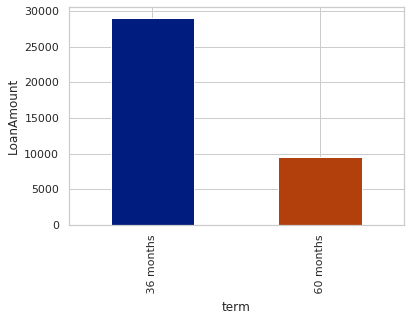

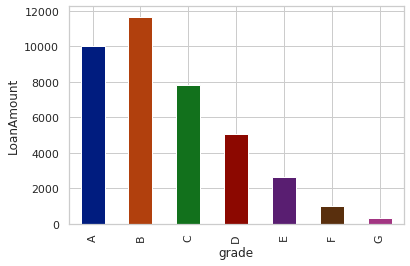

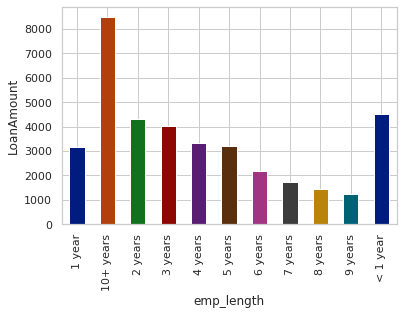

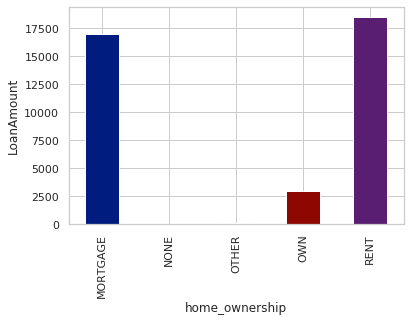

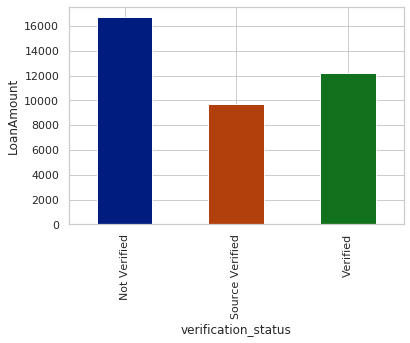

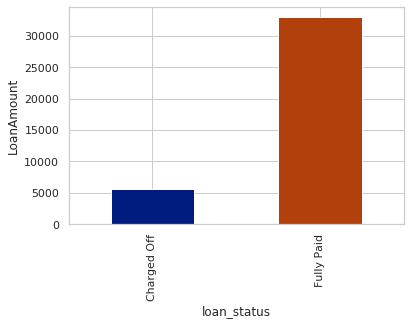

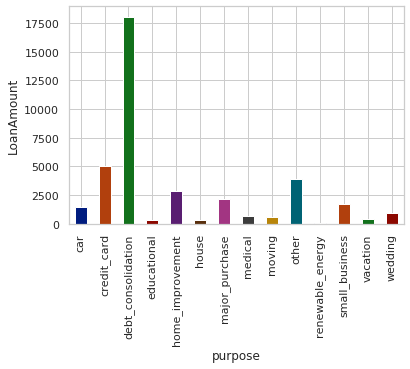

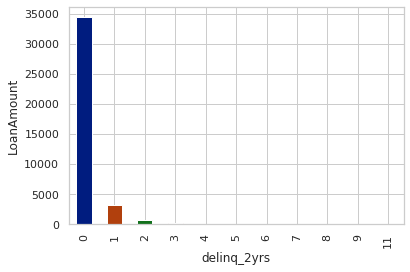

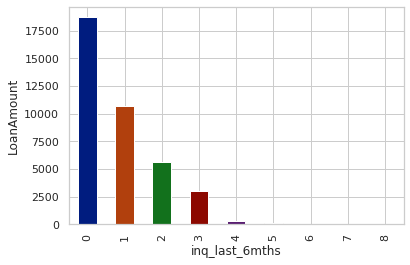

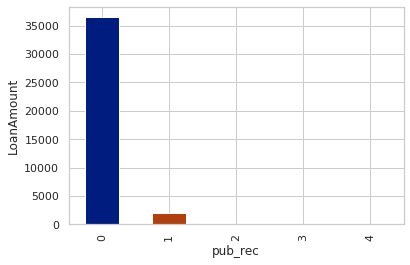

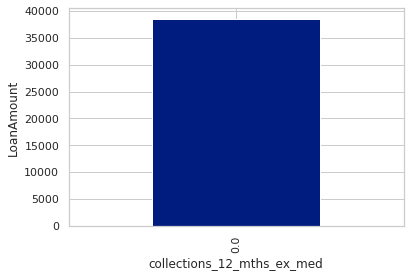

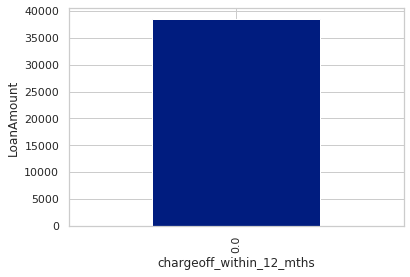

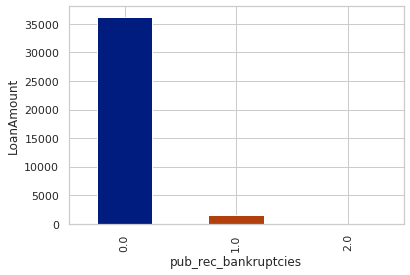

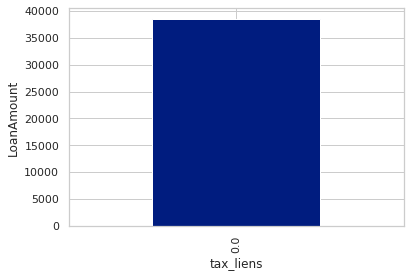

In [150]:
for column in catgoricalVariables:
    plotCategoricalVariables(column,loan)

In [0]:

def plotBox(columnName, dataFrame):
    sns.boxplot(x=dataFrame[columnName], y=dataFrame['loan_status'], data=dataFrame, palette=sns.color_palette('dark', 15))
    ax.set(xlabel= columnName , ylabel='Loan Status')
    plt.show()

In [0]:
def plotCategoricalDefaults(dataFrame, columnName):
    sns.set(style="whitegrid")
    dataFrame.groupby(columnName).loan_status.value_counts().unstack().plot.bar(color=sns.color_palette('dark', 15))
    plt.show()

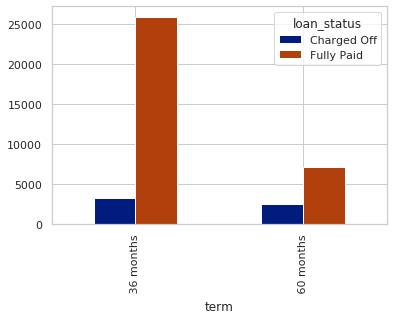

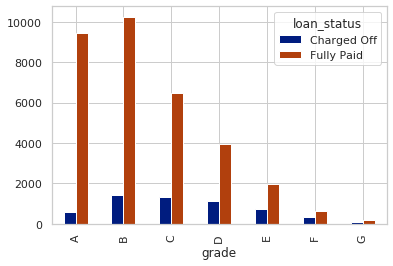

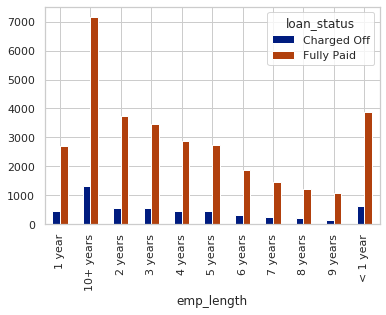

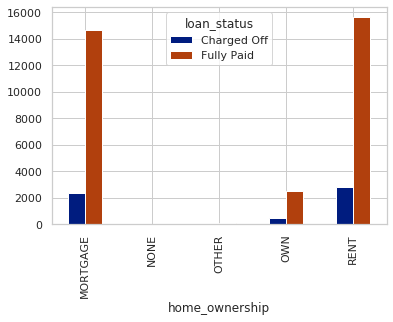

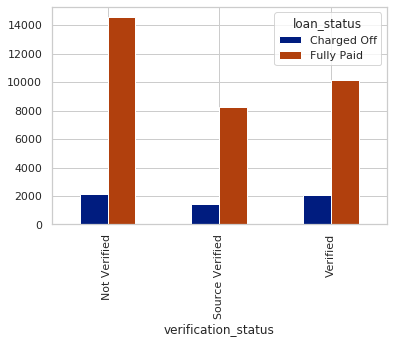

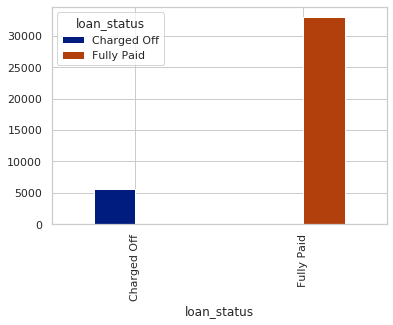

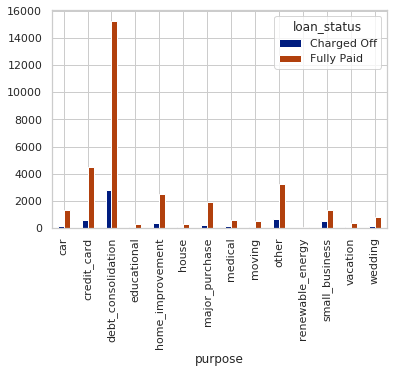

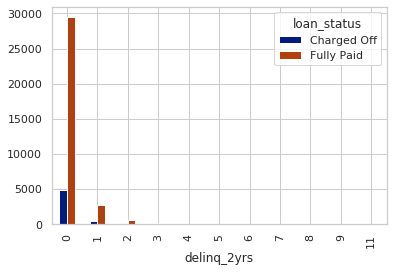

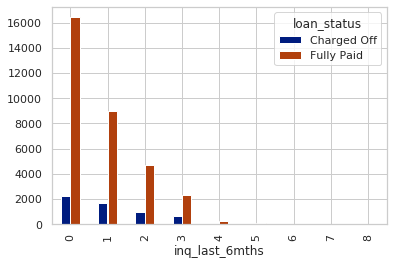

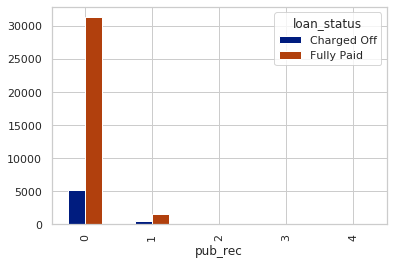

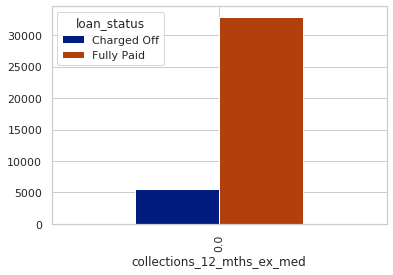

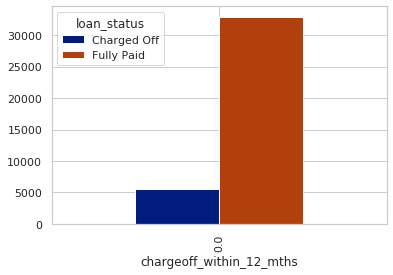

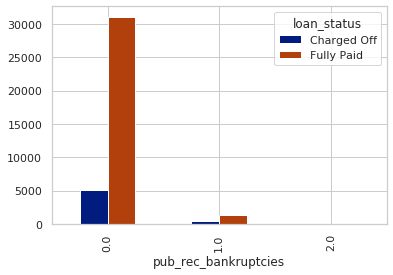

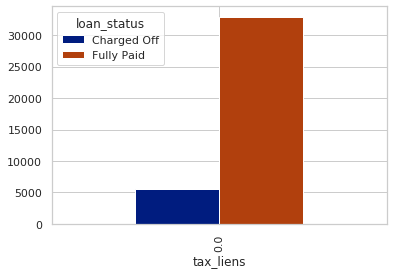

In [164]:


for column in catgoricalVariables:
    plotCategoricalDefaults(loan, column)

# ***Check Correlations ***

In [182]:
plt.figure(figsize=(10,10))

corr = loan[NonCategVal].corrwith(loan["hasDefaulted"], axis = 0)
print(corr)

loan_amnt               0.06
installment             0.03
annual_inc             -0.04
total_acc              -0.02
dti                     0.05
revol_bal               0.01
last_pymnt_amnt        -0.22
Loan_To_Income_Ratio    0.12
dtype: float64


<Figure size 720x720 with 0 Axes>

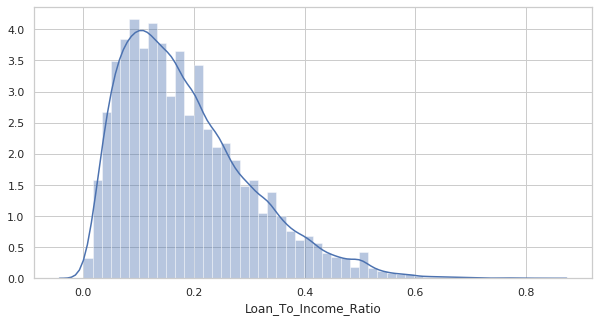

In [185]:
#loan to income ratio seems significant ,lets check more
plt.figure(figsize=(10,5))
sns.distplot(loan['Loan_To_Income_Ratio'])



count   32950.00
mean        0.18
std         0.11
min         0.00
25%         0.10
50%         0.16
75%         0.24
max         0.83
Name: Loan_To_Income_Ratio, dtype: float64
count   5627.00
mean       0.22
std        0.13
min        0.01
25%        0.11
50%        0.20
75%        0.30
max        0.82
Name: Loan_To_Income_Ratio, dtype: float64


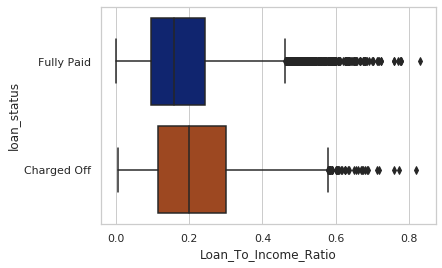

In [193]:

PaidLoan = loan[loan['loan_status']=='Fully Paid']
DefaultedLoan = loan[loan['loan_status']=='Charged Off']
print(PaidLoan['Loan_To_Income_Ratio'].describe())
print(DefaultedLoan['Loan_To_Income_Ratio'].describe())
plotBox("Loan_To_Income_Ratio", loan)


The Loan To Income Ratio is significantly Higher (25%) in DefaultedLoans 